In [1]:
import torch
from torch import nn
import torchvision
import torchlens as tl
from importlib import reload

In [2]:
import os

os.getcwd()

'/home/jtaylor'

In [ ]:
tl = reload(tl)


class RecurrentSameFuncs(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(in_features=5, out_features=5)

    def forward(self, x):
        x = self.fc(x)
        x = x + 1
        x = x * 2
        x = self.fc(x)
        x = x + 1
        x = x * 2
        x = self.fc(x)
        x = x + 1
        x = x * 2
        x = self.fc(x)
        return x


model = RecurrentSameFuncs()
x = torch.rand(6, 5)
tl.get_model_activations(model, x, vis_opt='rolled')['linear_1_1:2']


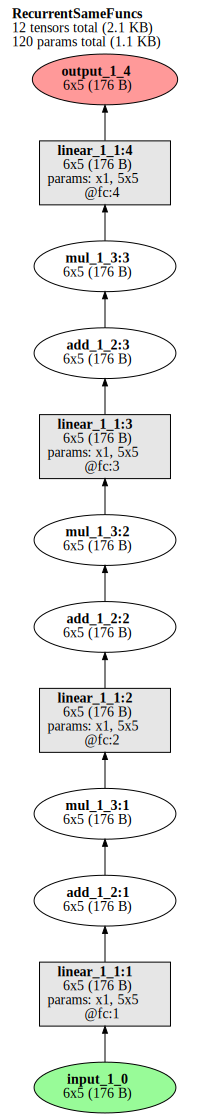

Log of RecurrentSameFuncs forward pass:
	Model structure: recurrent (at most 4 loops), without branching; 1 total modules.
	12 tensors (2.1 KB) computed in forward pass; 12 tensors (2.1 KB) saved.
	8 parameter operations (120 params total; 1.1 KB).
	Random seed: 3626529031
	Time elapsed: 0.014s
	Module Hierarchy:
		fc
		fc
		fc
		fc
	Layers:
		0: input_1_0 
		1: linear_1_1:1  (1/4 passes)
		2: add_1_2:1  (1/3 passes)
		3: mul_1_3:1  (1/3 passes)
		4: linear_1_1:2  (2/4 passes)
		5: add_1_2:2  (2/3 passes)
		6: mul_1_3:2  (2/3 passes)
		7: linear_1_1:3  (3/4 passes)
		8: add_1_2:3  (3/3 passes)
		9: mul_1_3:3  (3/3 passes)
		10: linear_1_1:4  (4/4 passes)
		11: output_1_4 

In [4]:
import torchvision

alexnet = torchvision.models.alexnet(pretrained=True)
alexnet = alexnet.to('cpu')
tl.get_model_activations(model, x, vis_opt='unrolled')


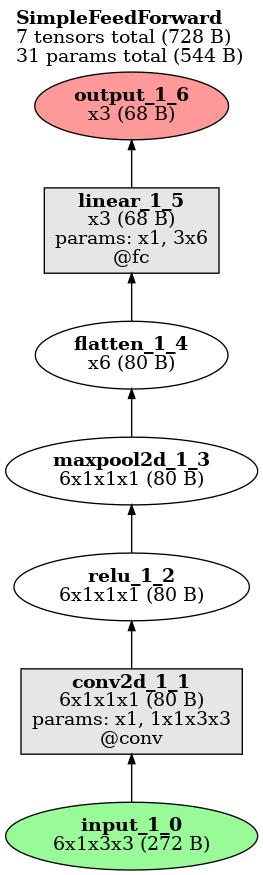

tensor([[[[0.0449]]],


        [[[0.3319]]],


        [[[0.4962]]],


        [[[0.3828]]],


        [[[0.0816]]],


        [[[0.5587]]]], grad_fn=<CloneBackward>)

In [6]:
class SimpleFeedForward(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(1, 1, 3, padding=0)
        self.fc = nn.Linear(6, 3)

    def forward(self, x):
        x = self.conv(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, 1)
        x = x.flatten()
        x = self.fc(x)
        return x


x = torch.rand(6, 1, 3, 3)
ff_model = SimpleFeedForward()
model_history = tl.get_model_activations(ff_model, x, vis_opt='unrolled')
model_history['conv2d_1_1'].tensor_contents

Example pictures:

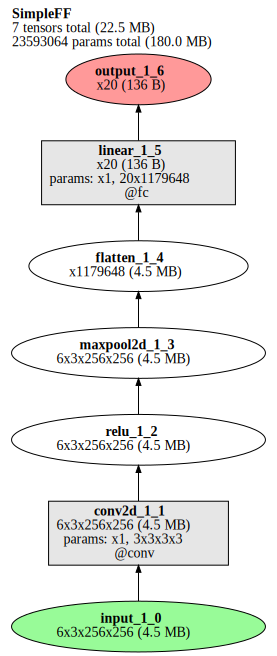

In [7]:
from os.path import join as opj
import os

out_dir = opj("/home/jtaylor/projects/torchlens/tests/example_visuals")


class SimpleFF(nn.Module):
    def __init__(self):
        """Conv, relu, pool, fc, output.

        """
        super().__init__()
        self.conv = nn.Conv2d(3, 3, 3, padding=1)
        self.fc = nn.Linear(1179648, 20)
        self.identity = nn.Identity()

    def forward(self, x):
        x = self.conv(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, 1)
        x = x.flatten()
        x = self.fc(x)
        return x


simple_ff = SimpleFF()
x = torch.ones(6, 3, 256, 256)
model_history = tl.get_model_activations(simple_ff, x, vis_opt='unrolled', vis_outpath=opj(out_dir, 'simple_ff'))



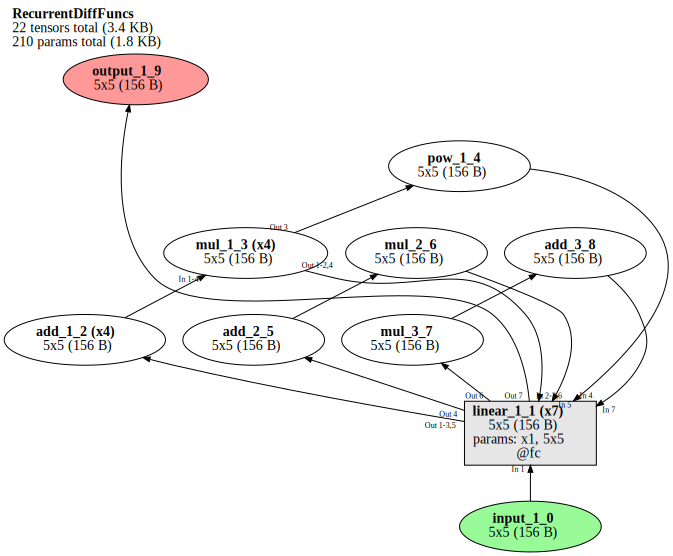

In [10]:
class RecurrentDiffFuncs(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(in_features=5, out_features=5)

    def forward(self, x):
        x = self.fc(x)
        x = x + 1
        x = x * 2
        x = self.fc(x)
        x = x + 1
        x = x * 2
        x = self.fc(x)
        x = x + 1
        x = x * 2
        x = x ** 3
        x = self.fc(x)
        x = x + 2
        x = x * 3
        x = self.fc(x)
        x = x + 1
        x = x * 2
        x = self.fc(x)
        x = x * 2
        x = x + 3
        x = self.fc(x)
        return x


x = torch.rand(5, 5)
recurrent = RecurrentDiffFuncs()
model_history = tl.get_model_activations(recurrent, x, vis_opt='rolled')


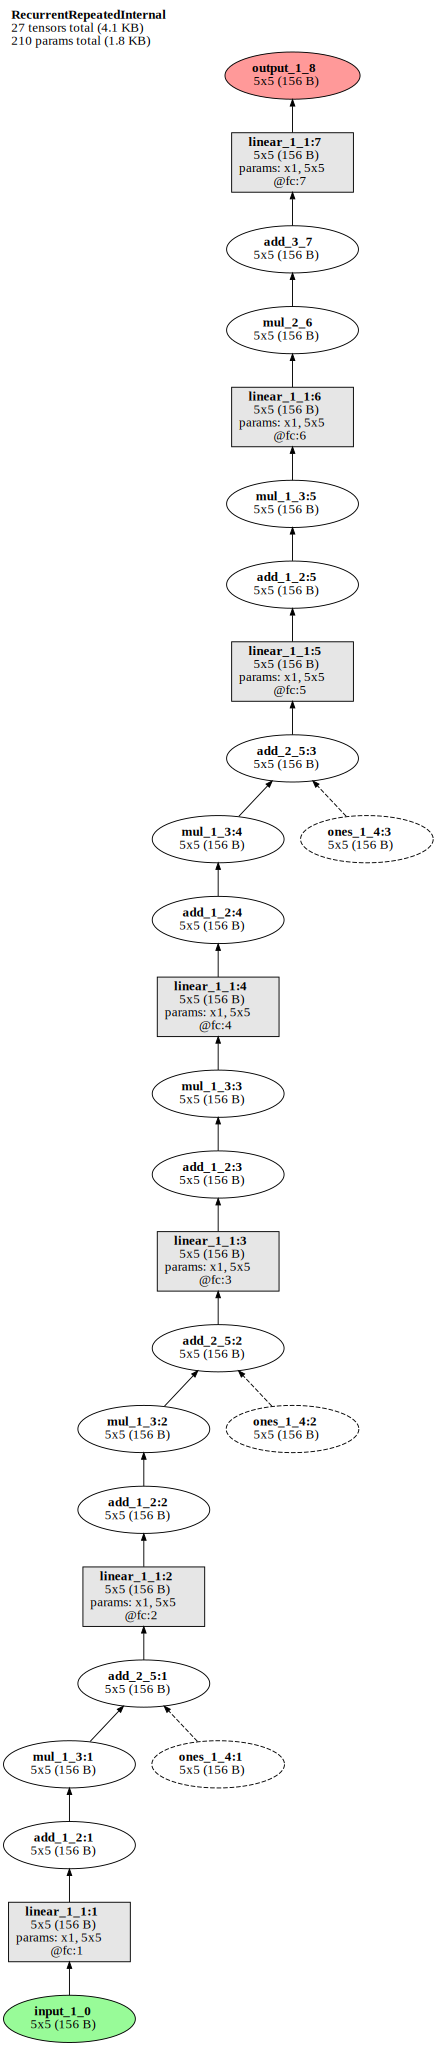

In [13]:
class RecurrentRepeatedInternal(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(in_features=5, out_features=5)

    def forward(self, x):
        x = self.fc(x)
        x = x + 1
        x = x * 2 + torch.ones(5, 5)
        x = self.fc(x)
        x = x + 1
        x = x * 2 + torch.ones(5, 5)
        x = self.fc(x)
        x = x + 1
        x = x * 2
        x = self.fc(x)
        x = x + 1
        x = x * 2 + torch.ones(5, 5)
        x = self.fc(x)
        x = x + 1
        x = x * 2
        x = self.fc(x)
        x = x * 2
        x = x + 3
        x = self.fc(x)
        return x


x = torch.rand(5, 5)
recurrent = RecurrentRepeatedInternal()
model_history = tl.get_model_activations(recurrent, x, vis_opt='unrolled',
                                         vis_outpath=opj(out_dir, 'recurrent_internal'))
